# FitBit Fitness Data Analysis (Capstone Design Project)
# 웰빙 테크 기업 Bellabeat의 데이터 분석 및 비즈니스 전략 수립 프로젝트

_본 과제는 [Google Data Analytics Professional Certificate](https://www.coursera.org/professional-certificates/google-data-analytics) 과정의 최종 프로젝트인 캡스톤 스터디의 일환으로 진행되었습니다._

### 분석 파이프라인
이번 프로젝트는 다음과 같은 분석 프로세스를 거친다.

- **문제 정의**: 명확한 '비즈니스 문제'(business task) 정의
- **데이터 준비**: 데이터 소스 확보, 저장, 정리
- **데이터 처리**: 데이터 정제, 조작 및 문서화
- **데이터 분석**: 비즈니스 문제해결에 유의한 인사이트 도출 (어떤 트렌드? 어떤 관계?)
- **결과 공유**: 결과 요약 및 시각화
- **액션플랜 수립**: 분석 결과를 기반으로 실행가능한 마케팅 전략 제시 

### 분석 기업 소개: 벨라비트 ([Bellabeat](https://bellabeat.com/))
벨라비트(Bellabeat)는 2014년에 설립된 헬스케어 첨단 기술 회사로, 여성 건강에 특화된 스마트 쥬얼리 웨어러블 제품을 주력 상품으로 판매하고 있다. 

당사의 웨어러블 기기들은 여성들의 건강과 직결되는 일상활동, 수면, 스트레스, 생식 건강과 관련된 데이터를 수집, 분석하여 이용자들에게 필요한 정보를 제공한다.

벨라비트 제품은 자체 이커머스 채널뿐만 아니라 다양한 온라인 소매업체들을 통해서도 판매되고 있다. 또한, 라디오, 야외 광고판, 인쇄 및 텔레비전과 같은 전통적인 광고 매체에 투자하면서도 디지털 마케팅에 중점을 두고 있다. 구글 검색에 지속적으로 투자하고 있으며, 페이스북과 인스타그램 페이지를 적극적으로 운영하고, 트위터에서 소비자들과 지속적으로 교류한다. 유튜브에 비디오 광고와 구글 디스플레이 네트워크에 디스플레이 광고 캠페인을 집행하곤 한다. 

## 문제정의
지금보다 한 단계 더 효율적인 마케팅 전략 수립을 위해 당사의 스마트 기기 사용 데이터를 분석하여 유저들의 서비스 이용에 대한 통찰을 얻고자 한다. 이를 위해 타사의 스마트 제품 사용 동향을 먼저 파악하고, 여기서 얻은 통찰을 당사의 제품에 적용하고자 한다.

    - (타사의) 스마트 기기 사용 트렌드는 어떤 것이 있는가?
    - 이러한 트렌드를 당사 제품에 적용해 유저 경험을 어떻게 개선해볼 수 있을까?








## 데이터 준비/처리
- 공개된 웨어러블 헬스 데이터로 핏빗 피트니스 트래커([FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit))의 데이터를 사용하고자 한다.
- 데이터 소개:
    - 데이터 제공에 동의한 30명의 핏빗 유저들의 1분 당 활동기록, 심박수, 수면 모니터링 기록.
    - 사용자들의 기기 종류에 따라 데이터 값이 상이할 수 있음.
 

In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False


In [3]:
# # 데이터 저장
# !kaggle datasets download -d arashnic/fitbit

# # 압축 풀기
# !unzip fitbit.zip

fitbit.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  fitbit.zip
  inflating: Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv  
  inflating: Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv  
  inflating: Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv  
  inflating: Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv  
  inflating: Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv  
  inflating: Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv  
  inflating: Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv  
  inflating: Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv  
  inflating: Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv  
  inflating: Fitabase Data 4.12.16-5.12.16/minuteCaloriesWide_merged.csv  
  inflating: Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv  
  inflating: Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv  
  inflat

In [2]:
# 데이터 확인
fitbit_dir = './Fitabase Data 4.12.16-5.12.16/'
files_in_dir = os.listdir(fitbit_dir)

print('FILES IN DIRECTORY:')
for file in files_in_dir:
    print('\t', fitbit_dir + file)
print('TOTAL: ', len(files_in_dir))


FILES IN DIRECTORY:
	 ./Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv
	 ./Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv
	 ./Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv
	 ./Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv
	 ./Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv
	 ./Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv
	 ./Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv
	 ./Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv
	 ./Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv
	 ./Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv
	 ./Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv
	 ./Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv
	 ./Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv
	 ./Fitabase Data 4.12.16-5.12.16/minuteCaloriesWide_merged.csv
	 ./Fitabase Data 4.12.16-5.12.16/minuteStepsNarrow_merged.csv
	 ./Fitabase Data 4.12.16-5.12.16/minuteStepsWide_merged.csv


- 전체 데이터는 총 18개의 csv 파일로 구성되어 있다. 심박수, 수면, 걸음, 칼로리, 체중 등의 기록들로 예상된다.
- 파일 제목을 훑어보면 'Narrow'와 'Wide' 형태의 파일들이 섞여 있는 것 같다. 또한, 병합된('merged') 데이터로 파악된다.
- 메타데이터가 제공되지 않아 파일 별로 데이터의 내용, 형태, 정합성, 무결성 등을 검토한 뒤 직접 메타데이터를 만들어보자.


In [3]:
# 개별 파일 전부 불러오기
dfs = {}

for file in files_in_dir:
    df_name = file.split('.')[0]
    dfs[df_name] = pd.read_csv(fitbit_dir + file)
    print(f'IMPORT COMPLETE: {df_name}')

IMPORT COMPLETE: minuteIntensitiesWide_merged
IMPORT COMPLETE: dailyActivity_merged
IMPORT COMPLETE: sleepDay_merged
IMPORT COMPLETE: heartrate_seconds_merged
IMPORT COMPLETE: minuteIntensitiesNarrow_merged
IMPORT COMPLETE: minuteMETsNarrow_merged
IMPORT COMPLETE: hourlySteps_merged
IMPORT COMPLETE: hourlyIntensities_merged
IMPORT COMPLETE: dailyCalories_merged
IMPORT COMPLETE: hourlyCalories_merged
IMPORT COMPLETE: minuteSleep_merged
IMPORT COMPLETE: minuteCaloriesNarrow_merged
IMPORT COMPLETE: dailySteps_merged
IMPORT COMPLETE: minuteCaloriesWide_merged
IMPORT COMPLETE: minuteStepsNarrow_merged
IMPORT COMPLETE: minuteStepsWide_merged
IMPORT COMPLETE: weightLogInfo_merged
IMPORT COMPLETE: dailyIntensities_merged


데이터가 엄청 많다... 제목을 봤을 때 minute (분 단위), hourly (시간 단위)가 들어간 데이터보다는 daily (일간) 데이터가 유저들의 기기 활용 트렌드를 보기에 용이할 것 같다. 또한, 중복데이터도 존재하는 것으로 보인다(dailyCalories_merged, dailySteps_merged). 따라서 아래의 몇 개의 데이터에만 선택과 집중을 하도록 하자.
- dailyActivity_merged
- sleepDay_merged
- weightLogInfo_merged (체중 데이터는 최소 하루 이상에 걸쳐 측정을 했을테니 포함)
- dailyIntensities_merged

## 탐색적 데이터 분석

### 1. 일간 활동량
- 33명의 참가자들의 보행, 활동량, 칼로리 소모 데이터.
- 이 중에서 가장 흔하게 사용되는 만보기 데이터(보행량)와 소모 칼로리 데이터만 가져와보자.


In [4]:
activity = dfs['dailyActivity_merged']
activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


ActivityDate를 날짜 변수로 바꿔주자.

In [5]:
activity['ActivityDate'] = pd.to_datetime(activity['ActivityDate'], format='%m/%d/%Y')

불필요한 열 삭제

In [6]:
activity = activity[['Id', 'ActivityDate', 'TotalSteps', 'Calories']]
activity.head()

,Id,ActivityDate,TotalSteps,Calories
0,1503960366,2016-04-12,13162,1985
1,1503960366,2016-04-13,10735,1797
2,1503960366,2016-04-14,10460,1776
3,1503960366,2016-04-15,9762,1745
4,1503960366,2016-04-16,12669,1863


In [7]:
activity.describe()

,Id,TotalSteps,Calories
count,9.400000e+02,940.000000,940.000000
mean,4.855407e+09,7637.910638,2303.609574
std,2.424805e+09,5087.150742,718.166862
min,1.503960e+09,0.000000,0.000000
25%,2.320127e+09,3789.750000,1828.500000
50%,4.445115e+09,7405.500000,2134.000000
75%,6.962181e+09,10727.000000,2793.250000
max,8.877689e+09,36019.000000,4900.000000


In [8]:
activity['TotalSteps'].median()

7405.5

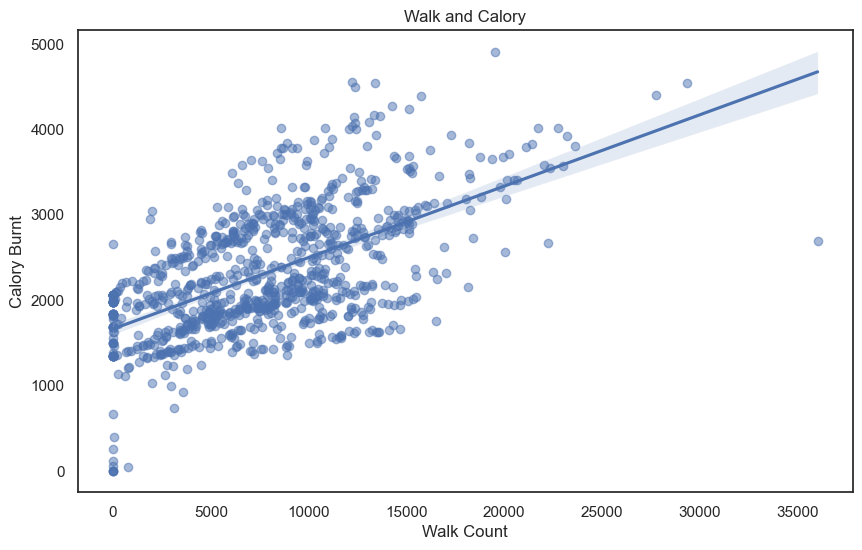

In [92]:
plt.figure(figsize=(10,6))
sns.regplot(x='TotalSteps', y='Calories', data=activity, scatter_kws={'alpha':0.5})
plt.title('Walk and Calory')
plt.xlabel('Walk Count')
plt.ylabel('Calory Burnt')
plt.show()


평균 걸음수는 약 7600보 (중간값: 7405, 표준편차 5000), 평균 칼로리 소모는 약 2300칼로리 (표준편차 718)로 확인된다. 데이터의 편차가 좀 큰 편.미국 성인의 하루 평균 걸음걸이가 4000보 정도로 알려진 점을 고려할 때([한국일보 자료](https://m.hankookilbo.com/News/Read/A2021100122140004827)), 실험의 참가자들은 액티브 유저들인 것으로 판단된다. 즉, 표본이 무선표집되지 않았을 가능성이 있어 주의가 필요하겠다. 

걸음수와 칼로리 소모량을 정적 상관관계를 보인다. 

### 2. 체중 변화
- datetime 별로 유저가 입력한 몸무게 값의 데이터다. 
- 데이터를 들어다 보기 전에 몇 가지 전처리 작업이 필요하다.
    - 'Date' 칼럼의 타입을 datetime으로 변환
    - 사용할 칼럼: 'Date'(시계열), 'WeightKg', 'BMI'

In [10]:
weight = dfs['weightLogInfo_merged']
weight.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [11]:
# datetime 변환
weight['Date'] = pd.to_datetime(weight['Date'], format='%m/%d/%Y %I:%M:%S %p')

# 칼럼제거
weight = weight[['Id', 'Date', 'WeightKg', 'BMI']]
weight.head()

,Id,Date,WeightKg,BMI
0,1503960366,2016-05-02 23:59:59,52.599998,22.650000
1,1503960366,2016-05-03 23:59:59,52.599998,22.650000
2,1927972279,2016-04-13 01:08:52,133.500000,47.540001
3,2873212765,2016-04-21 23:59:59,56.700001,21.450001
4,2873212765,2016-05-12 23:59:59,57.299999,21.690001


In [12]:
weight.Id.unique()

array([1503960366, 1927972279, 2873212765, 4319703577, 4558609924,
       5577150313, 6962181067, 8877689391])

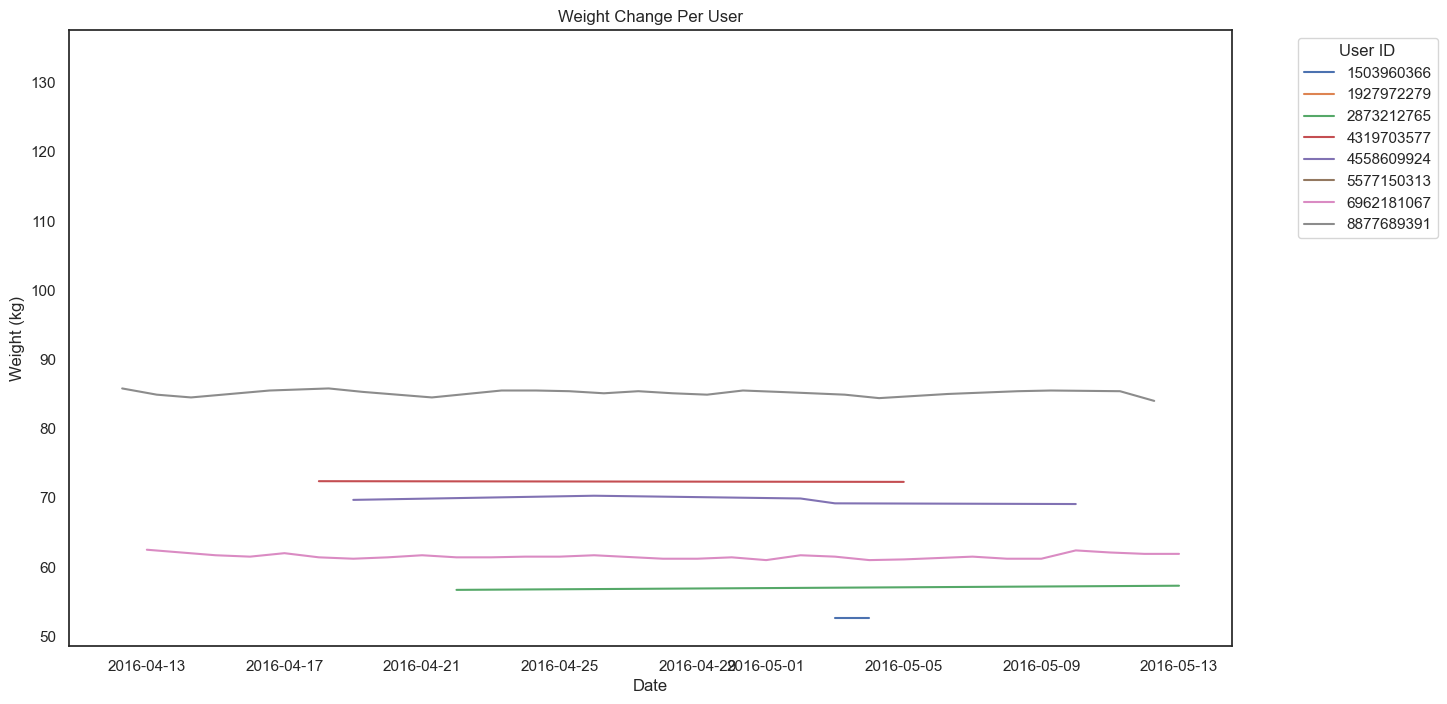

In [94]:
plt.figure(figsize=(15,8))
# 유저별로 시계열 데이터 그리기
for participant in weight['Id'].unique():
    participant_data = weight[weight['Id'] == participant]
    sns.lineplot(x='Date', y='WeightKg', data=participant_data, label=str(participant))

plt.title('Weight Change Per User')
plt.xlabel('Date')
plt.ylabel('Weight (kg)')
plt.legend(title='User ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

아쉽게도 8명의 참가자의 체중 데이터 밖에 없다. 더군다나 시간에 따른 뚜렷한 체중변화도 확인되지 않아(시계열이 짧은 탓도 있겠다) 유의미한 추론을 하기는 어려워 보인다. 

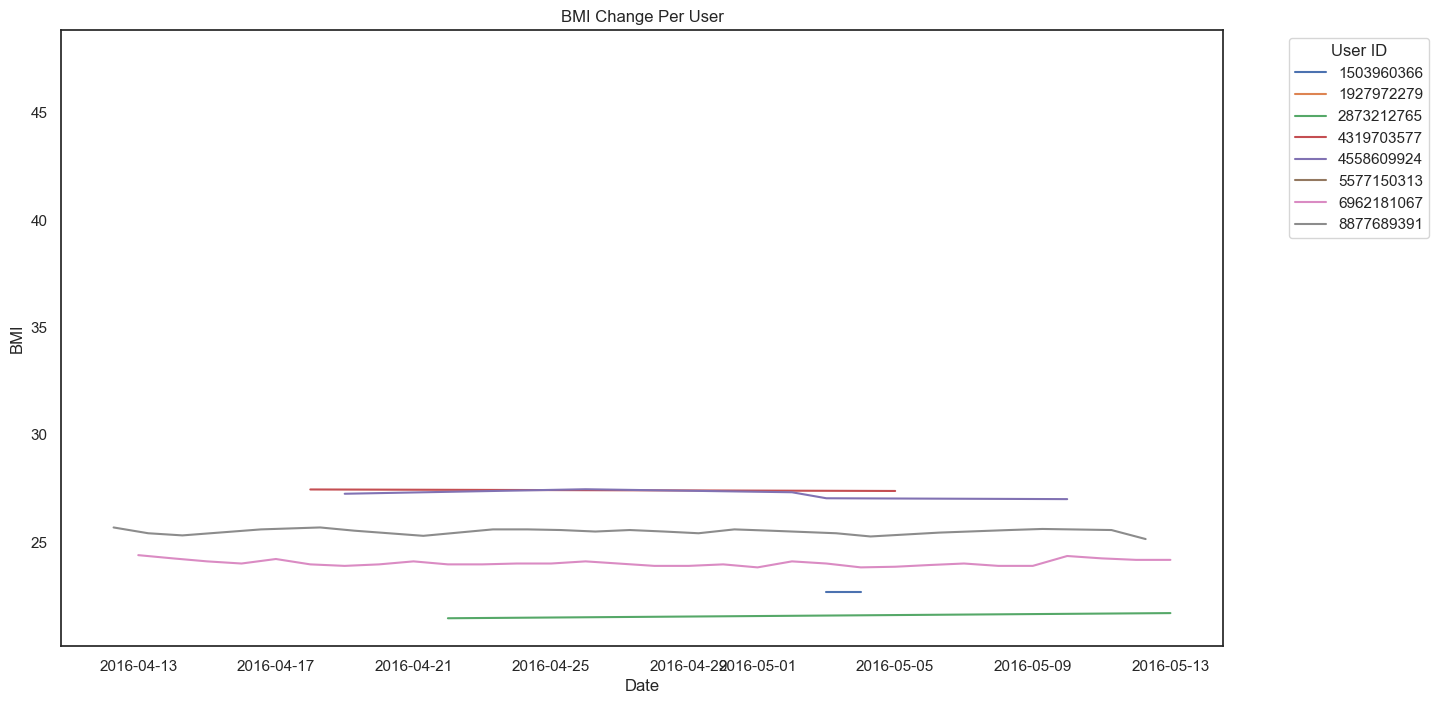

In [95]:
plt.figure(figsize=(15,8))
# 유저별로 시계열 데이터 그리기
for participant in weight['Id'].unique():
    participant_data = weight[weight['Id'] == participant]
    sns.lineplot(x='Date', y='BMI', data=participant_data, label=str(participant))

plt.title('BMI Change Per User')
plt.xlabel('Date')
plt.ylabel('BMI')
plt.legend(title='User ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

당연하겠지만 BMI도 변화는 없다.

### 3. 일별 수면 패턴
- 24명의 유저의 수면 데이터.
- 하루 중 수면 횟수, 수면시간, 누워있는 시간이 기록되어 있다.

In [15]:
sleep = dfs['sleepDay_merged']
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [16]:
sleep.Id.unique().shape

(24,)

In [17]:
sleep.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [18]:
sleep

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


In [20]:
sleep['BedToSleepRatio'] = sleep['TotalMinutesAsleep'] / sleep['TotalTimeInBed']

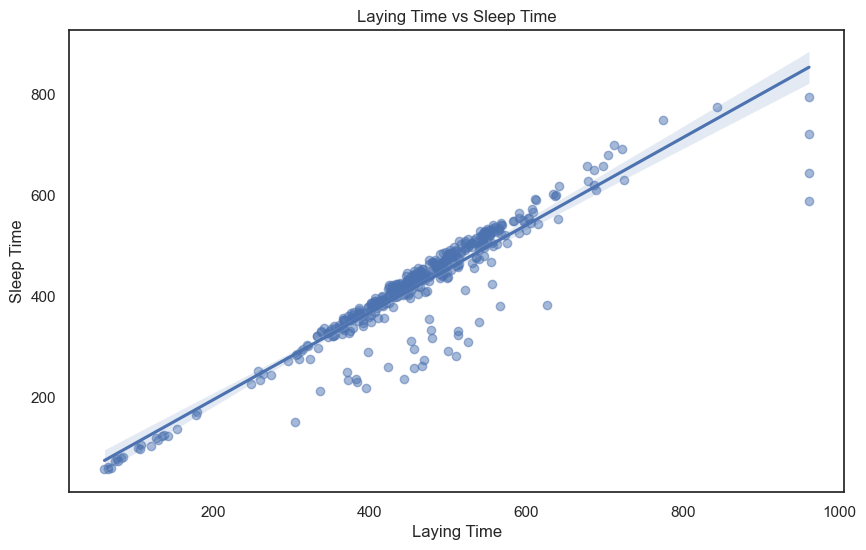

In [96]:
plt.figure(figsize=(10,6))
sns.regplot(x='TotalTimeInBed', y='TotalMinutesAsleep', data=sleep, scatter_kws={'alpha':0.5})
plt.title('Laying Time vs Sleep Time')
plt.xlabel('Laying Time')
plt.ylabel('Sleep Time')
plt.show()


In [24]:
print('수면시간과 누워있는 시간 비율: ', sleep['BedToSleepRatio'].mean())
print('수면시간과 누워있는 시간 비율 최소: ', sleep['BedToSleepRatio'].min())
print('수면시간과 누워있는 시간 비율 최대: ', sleep['BedToSleepRatio'].max())

수면시간과 누워있는 시간 비율:  0.9167692065151059
수면시간과 누워있는 시간 비율 최소:  0.49836065573770494
수면시간과 누워있는 시간 비율 최대:  1.0


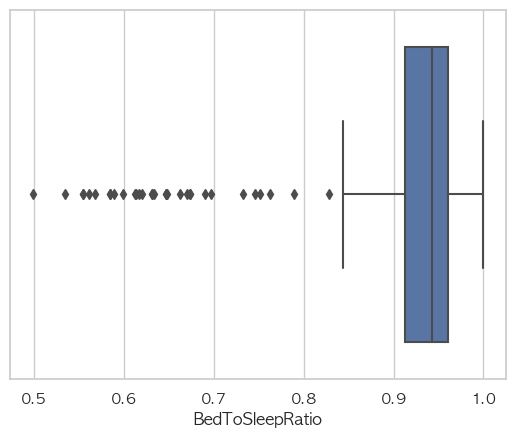

In [25]:
sns.boxplot(x = "BedToSleepRatio",  data = sleep)
plt.show()

In [40]:
bsrQ1 = sleep['BedToSleepRatio'].quantile(.25)
bsrQ3 = sleep['BedToSleepRatio'].quantile(.75)
bsr_IQR = bsrQ3 - bsrQ1

bsr_low_whisker = bsrQ1 - bsr_IQR
print('OUTLIER THRESHOLD: ', bsr_low_whisker)
print('VALUE COUNT BELOW THRESHOLD: ', (sleep['BedToSleepRatio'] < bsr_low_whisker).sum())
print('USERS BELOW THRESHOLD: ', len(sleep[sleep['BedToSleepRatio'] < bsr_low_whisker]['Id'].unique()))

OUTLIER THRESHOLD:  0.8636746455443339
VALUE COUNT BELOW THRESHOLD:  37
USERS BELOW THRESHOLD:  8


산점도를 보면 누워있는 시간과 수면시간 사이의 뚜렷한 선형 관계가 보인다. 다만 그 아래 박스플롯에 보이듯이 누워있는 시간 대비 수면 시간이 낮은 사람들이 몇 보인다.

이들은(=8명/24명; 33.3%) 수면시간/누워있는시간 비율이 86% 이하인 경우를 의미한다. 8시간을 누워있다고 할 때 실제 수면시간은 대략 7시간 미만인 셈. 

**다른 유저들에 비해 수면시간이 부족하다면, 이들에게 수면 유도 알람을 보내 수면 패턴을 개선하는 아이디어도 고려해볼 수 있을 것 같다.**

### 4. 하루 중 활동량/활동 강도
- 시간대별 활동 강도, 걸음수, 칼로리 소모량 데이터를 결합(merge)해서 살펴보자.

In [45]:
dfs.keys()

dict_keys(['minuteIntensitiesWide_merged', 'dailyActivity_merged', 'sleepDay_merged', 'heartrate_seconds_merged', 'minuteIntensitiesNarrow_merged', 'minuteMETsNarrow_merged', 'hourlySteps_merged', 'hourlyIntensities_merged', 'dailyCalories_merged', 'hourlyCalories_merged', 'minuteSleep_merged', 'minuteCaloriesNarrow_merged', 'dailySteps_merged', 'minuteCaloriesWide_merged', 'minuteStepsNarrow_merged', 'minuteStepsWide_merged', 'weightLogInfo_merged', 'dailyIntensities_merged'])

In [51]:
hourly_intensity = dfs['hourlyIntensities_merged']  # 시간대별 활동 강도
hourly_steps = dfs['hourlySteps_merged']   # 시간대별 걸음수
hourly_calories = dfs['hourlyCalories_merged']   # 시간대별 칼로리 소모량

display(hourly_intensity.head())
print('시간대별 활동 강도')
display(hourly_steps.head())
print('시간대별 걸음수')
display(hourly_calories.head())
print('시간대별 칼로리 소모량')

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000


시간대별 활동 강도


,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


시간대별 걸음수


,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


시간대별 칼로리 소모량


In [52]:
hourly_intensity.shape, hourly_steps.shape, hourly_calories.shape

((22099, 4), (22099, 3), (22099, 3))

In [53]:
merged_df = pd.merge(hourly_intensity, hourly_steps, on=['Id', 'ActivityHour'])
merged_df = pd.merge(merged_df, hourly_calories, on=['Id', 'ActivityHour'])
merged_df.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity,StepTotal,Calories
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333,373,81
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333,160,61
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667,151,59
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000,0,47
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000,0,48


In [61]:
merged_df['ActivityHour'] = pd.to_datetime(merged_df['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')

In [70]:
hourly_activity = merged_df.groupby(['ActivityHour']).agg('mean').drop(columns='Id')
hourly_activity['Time'] = hourly_activity.index.time
hourly_activity

,TotalIntensity,AverageIntensity,StepTotal,Calories,Time
ActivityHour,,,,,
2016-04-12 00:00:00,1.424242,0.023737,38.545455,69.272727,00:00:00
2016-04-12 01:00:00,0.636364,0.010606,9.515152,67.939394,01:00:00
2016-04-12 02:00:00,0.818182,0.013636,13.363636,68.424242,02:00:00
2016-04-12 03:00:00,0.393939,0.006566,6.818182,67.303030,03:00:00
2016-04-12 04:00:00,0.393939,0.006566,9.575758,67.787879,04:00:00
...,...,...,...,...,...
2016-05-12 11:00:00,14.000000,0.233333,390.600000,103.666667,11:00:00
2016-05-12 12:00:00,21.230769,0.353846,609.307692,118.461538,12:00:00
2016-05-12 13:00:00,16.333333,0.272222,476.833333,106.833333,13:00:00


In [72]:
# 시간대 별로 평균낸 데이터
average_by_time = hourly_activity.groupby('Time').mean().reset_index()
average_by_time

,Time,TotalIntensity,AverageIntensity,StepTotal,Calories
0,00:00:00,2.108996,0.035150,41.680498,71.764300
1,01:00:00,1.407771,0.023463,22.815207,70.135660
2,02:00:00,1.042289,0.017371,17.140454,69.180997
3,03:00:00,0.442861,0.007381,6.351569,67.547511
4,04:00:00,0.644096,0.010735,12.929111,68.308915
5,05:00:00,5.001009,0.083350,44.425002,81.878424
6,06:00:00,7.762433,0.129374,178.774471,86.990489
7,07:00:00,10.673589,0.177893,305.562918,94.388251
8,08:00:00,14.504346,0.241739,420.908448,102.967924
9,09:00:00,15.252505,0.254208,428.740592,105.844896


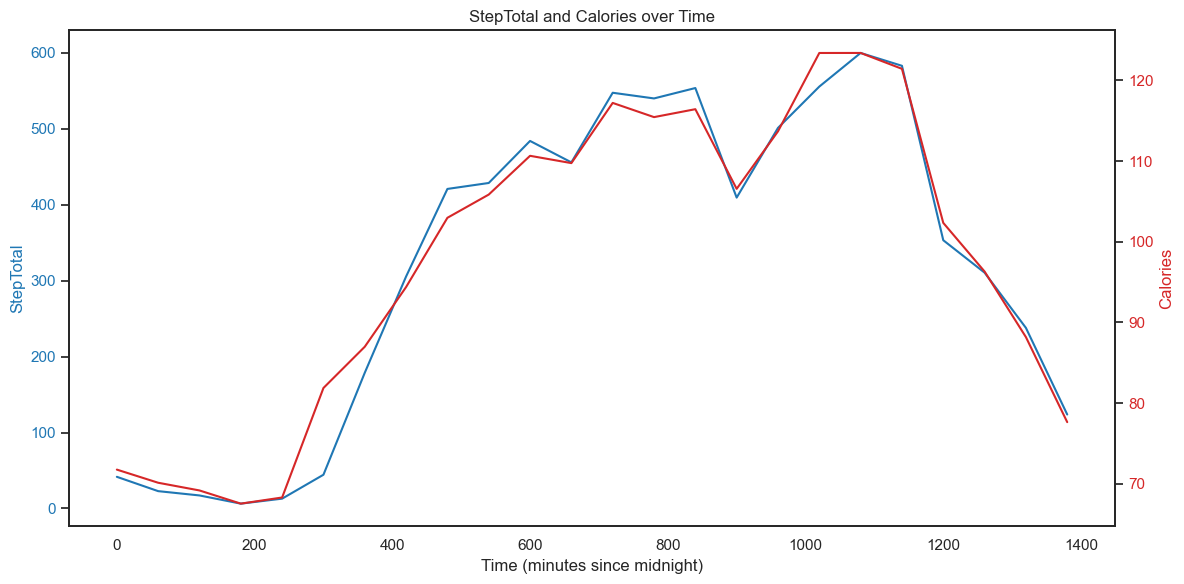

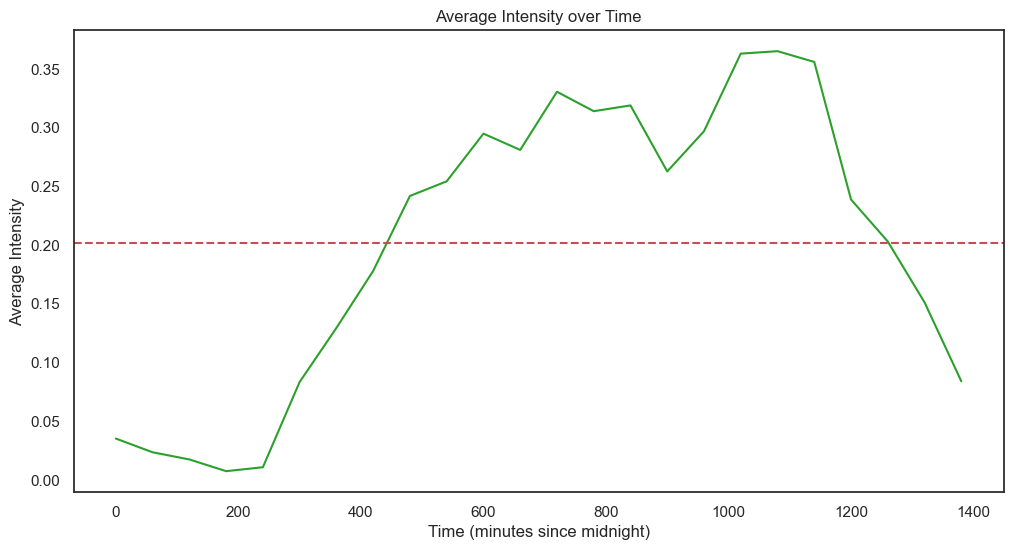

In [97]:
sns.set(style="white")
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting StepTotal and Calories on the same plot with dual axis
color = 'tab:blue'
ax1.set_xlabel('Time (minutes since midnight)')
ax1.set_ylabel('StepTotal', color=color)
ax1.plot(average_by_time['TimeNumeric'], average_by_time['StepTotal'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Calories', color=color)  
ax2.plot(average_by_time['TimeNumeric'], average_by_time['Calories'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('StepTotal and Calories over Time')
fig.tight_layout()  
plt.show()

# Plotting AverageIntensity as a separate plot
intensity_mean = average_by_time.AverageIntensity.mean()
plt.figure(figsize=(12, 6))
plt.plot(average_by_time['TimeNumeric'], average_by_time['AverageIntensity'], color='tab:green')
plt.axhline(y=intensity_mean, color='r', linestyle='--', label=f'Average Intensity: {intensity_mean:.2f}')
plt.xlabel('Time (minutes since midnight)')
plt.ylabel('Average Intensity')
plt.title('Average Intensity over Time')
plt.show()


데이터가 전처리가 너무 잘 되어 있는 탓일까, 워낙 상관관계가 높은 변수들을 사용한 탓일까, 걸음수, 소모 칼로리, 활동 강도가 매우 유사한 패턴을 보인다.

오전 10시 ~ 오후 1시에 활동량이 증가했다가, 오후 5시 ~ 7시 사이에 뚜렷한 활동량 증가 추세가 확인된다.

**이 시간대의 유저의 활동량이 특정 지표 이하로 내려갈 경우에 활동 장려 알림을 전송하는 방법을 고려해볼 수 있겠다.**

## 결과 요약

- 걸음수와 칼로리 소모량은 정적 상관관계를 보인다.
- 체중 및 BMI 수치의 변화는 관찰되지 않는다.
- 누워있는 시간과 수면 시간은 뚜렷한 정적 상관관계를 보이며, 유저 중 1/3은 누워 있는 시간에 비해 수면 시간이 부족한 경향을 보인다.
- 하루 중 뚜렷하게 활동 강도가 증가하는 시간대가 존재한다. 그리고 이 패턴은 걸음수와 칼로리 소모량과 높은 상관관계를 나타낸다.

### 함의점
- 활동 강도는 곧 걸음수와 칼로리 소모량과 매우 뚜렷한 상관관계를 나타낸다.
- 따라서 걸음수 증대를 유도할 수 있는 프로모션을 고민해볼 수 있겠다.
- 누워 있는 시간과 수면 시간 간의 괴리가 발생할 수 있다. 따라서 수면의 질을 높일 수 있는 프로모션을 고민해 볼 수 있겠다.

## 액션 플랜

#### 1. 알림 시스템
- 일반적으로 활동량이 많은 시간대에 실제 활동량이 평균 이하로 감소할 경우, 알림을 제공한다.
- 누워있는 시간과 수면 시간 비율의 통계를 제공한다.

#### 2. 보상 시스템
- 활동량 또는 수면 시간의 개선을 보이거나, 일정 기간 동안 유지할 경우, '트로피'와 같은 보상 아이템을 제공한다.
